In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [3]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

In [2]:
custom_palette = ['#33A4FF', '#FFB733', '#9FF767']
sns.set_palette(custom_palette)

In [3]:
df = pd.read_csv("sample_for_enn.csv")
df

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,0.0,2.0,1.5,0.9,74.0,200.0,95.0,95.0,49.0,14.9,1.0,0.5,19.0,13.0,38.0,3.0,1.0,20.811655,0.0
1,1.0,0.0,1.2,1.2,99.0,192.0,65.0,120.0,32.0,15.6,1.0,1.1,37.0,35.0,31.0,1.0,1.0,26.234568,0.0
2,1.0,2.0,0.1,0.3,75.0,157.0,62.0,84.0,52.0,15.0,1.0,1.0,31.0,57.0,32.0,3.0,1.0,23.148148,0.0
3,0.0,3.0,1.2,1.5,61.0,145.0,62.0,67.0,76.0,12.3,1.0,0.5,15.0,11.0,21.0,1.0,1.0,20.202020,0.0
4,1.0,3.0,1.5,1.5,64.0,207.0,42.0,127.0,191.0,16.9,1.0,1.1,33.0,59.0,22.0,3.0,0.0,26.122449,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67613,1.0,3.0,1.0,0.8,82.0,216.0,36.0,102.0,390.0,16.5,1.0,1.1,54.0,125.0,166.0,3.0,1.0,31.221304,2.0
67614,1.0,0.0,1.2,1.2,80.0,221.0,39.0,119.0,316.0,17.1,1.0,1.1,31.0,93.0,74.0,1.0,1.0,36.332180,2.0
67615,0.0,3.0,0.7,0.2,70.0,301.0,62.0,230.0,137.0,15.1,5.0,0.8,13.0,11.0,26.0,2.0,1.0,27.548209,2.0
67616,1.0,3.0,1.2,1.2,78.0,277.0,44.0,180.0,262.0,16.1,1.0,0.9,41.0,64.0,55.0,3.0,1.0,31.250000,2.0


In [16]:
from pycaret.classification import *
exp_name = setup(data =  df,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

,Description,Value
0,Session id,4227
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(67618, 19)"
4,Transformed data shape,"(67618, 19)"
5,Transformed train set shape,"(47332, 19)"
6,Transformed test set shape,"(20286, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9539,0.8062,0.9539,0.9412,0.9429,0.3311,0.3756,6.9100
svm,SVM - Linear Kernel,0.9124,0.0000,0.9124,0.9307,0.9111,0.1936,0.2500,7.4130
nb,Naive Bayes,0.9039,0.8885,0.9039,0.9436,0.9219,0.3175,0.3364,7.8180


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
tune_model(create_model('nb'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9037,0.8873,0.9037,0.9441,0.9222,0.3167,0.3357
1,0.9075,0.8985,0.9075,0.9460,0.9249,0.3321,0.3503
2,0.9028,0.8852,0.9028,0.9452,0.9218,0.3275,0.3494
3,0.8986,0.8923,0.8986,0.9422,0.9182,0.3030,0.3240
4,0.9049,0.8913,0.9049,0.9472,0.9240,0.3420,0.3648
5,0.9013,0.8827,0.9013,0.9423,0.9200,0.3094,0.3289
6,0.9123,0.9034,0.9123,0.9446,0.9269,0.3349,0.3490
7,0.8994,0.8721,0.8994,0.9408,0.9183,0.2910,0.3090
8,0.9077,0.8889,0.9077,0.9440,0.9242,0.3308,0.3484


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9398,0.8892,0.9398,0.9387,0.9392,0.3865,0.3866
1,0.9373,0.9006,0.9373,0.9380,0.9376,0.3768,0.3769
2,0.9334,0.8790,0.9334,0.9360,0.9347,0.3484,0.3486
3,0.9301,0.8933,0.9301,0.9364,0.9331,0.3471,0.3484
4,0.9343,0.8913,0.9343,0.9407,0.9370,0.3987,0.4012
5,0.9362,0.8892,0.9362,0.9405,0.9383,0.3850,0.3855
6,0.9408,0.9020,0.9408,0.9406,0.9407,0.4034,0.4034
7,0.9364,0.8780,0.9364,0.9348,0.9356,0.3387,0.3388
8,0.9370,0.8984,0.9370,0.9394,0.9381,0.3875,0.3879


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GaussianNB(priors=None, var_smoothing=0.009)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("diabete", axis = 1), 
                                                    df["diabete"], 
                                                    test_size=0.2, random_state=42)

train_accuracy_score: 0.9339298258586904
train_recall_score: 0.9339298258586904
train_precision_score: 0.9339298258586904
train_f1_score: 0.9339298258586904

test_accuracy_score: 0.936483288967761
test_recall_score: 0.936483288967761
test_precision_score: 0.936483288967761
test_f1_score: 0.936483288967761


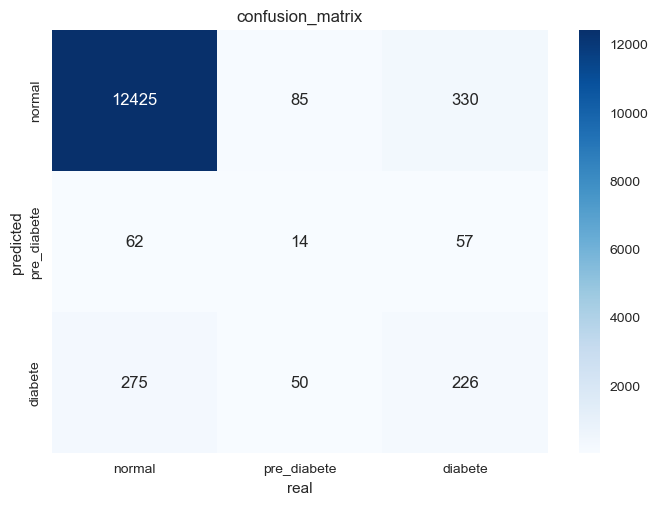

In [19]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB(priors=None, var_smoothing=0.009)
nb_clf.fit(X_train, y_train)

predict_train_nb = nb_clf.predict(X_train)
predict_test_nb = nb_clf.predict(X_test)

nb_train_accuracy = accuracy_score(predict_train_nb, y_train)
nb_train_recall = recall_score(predict_train_nb, y_train, average= 'micro')
nb_train_precision = precision_score(predict_train_nb, y_train, average= 'micro')
nb_train_f1 = f1_score(predict_train_nb, y_train, average= 'micro')

nb_test_accuracy = accuracy_score(predict_test_nb, y_test)
nb_test_recall = recall_score(predict_test_nb, y_test, average= 'micro')
nb_test_precision = precision_score(predict_test_nb, y_test, average= 'micro')
nb_test_f1 = f1_score(predict_test_nb, y_test, average= 'micro')

print(f'train_accuracy_score: {nb_train_accuracy}')
print(f'train_recall_score: {nb_train_recall}')
print(f'train_precision_score: {nb_train_precision}')
print(f'train_f1_score: {nb_train_f1}')
print()
print(f'test_accuracy_score: {nb_test_accuracy}')
print(f'test_recall_score: {nb_test_recall}')
print(f'test_precision_score: {nb_test_precision}')
print(f'test_f1_score: {nb_test_f1}')

conf_matrix = confusion_matrix(y_test, predict_test_nb)

# seaborn을 사용하여 혼동 행렬을 히트맵으로 표시
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['normal', 'pre_diabete', 'diabete'],
            yticklabels=['normal', 'pre_diabete', 'diabete'])

plt.title('confusion_matrix')
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train, sample_weight= 4)

predict_train_nb = nb_clf.predict(X_train)
predict_test_nb = nb_clf.predict(X_test)

nb_train_accuracy = accuracy_score(predict_train_nb, y_train)
nb_train_recall = recall_score(predict_train_nb, y_train, average= 'micro')
nb_train_precision = precision_score(predict_train_nb, y_train, average= 'micro')
nb_train_f1 = f1_score(predict_train_nb, y_train, average= 'micro')

nb_test_accuracy = accuracy_score(predict_test_nb, y_test)
nb_test_recall = recall_score(predict_test_nb, y_test, average= 'micro')
nb_test_precision = precision_score(predict_test_nb, y_test, average= 'micro')
nb_test_f1 = f1_score(predict_test_nb, y_test, average= 'micro')

print(f'train_accuracy_score: {nb_train_accuracy}')
print(f'train_recall_score: {nb_train_recall}')
print(f'train_precision_score: {nb_train_precision}')
print(f'train_f1_score: {nb_train_f1}')
print()
print(f'test_accuracy_score: {nb_test_accuracy}')
print(f'test_recall_score: {nb_test_recall}')
print(f'test_precision_score: {nb_test_precision}')
print(f'test_f1_score: {nb_test_f1}')

conf_matrix = confusion_matrix(y_test, predict_test_nb)

# seaborn을 사용하여 혼동 행렬을 히트맵으로 표시
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['normal', 'pre_diabete', 'diabete'],
            yticklabels=['normal', 'pre_diabete', 'diabete'])

plt.title('confusion_matrix')
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()


train_accuracy_score: 0.8742374385329241
train_recall_score: 0.8742374385329241
train_precision_score: 0.8742374385329241
train_f1_score: 0.8742374385329241

test_accuracy_score: 0.8773291925465838
test_recall_score: 0.8773291925465838
test_precision_score: 0.8773291925465838
test_f1_score: 0.8773291925465838


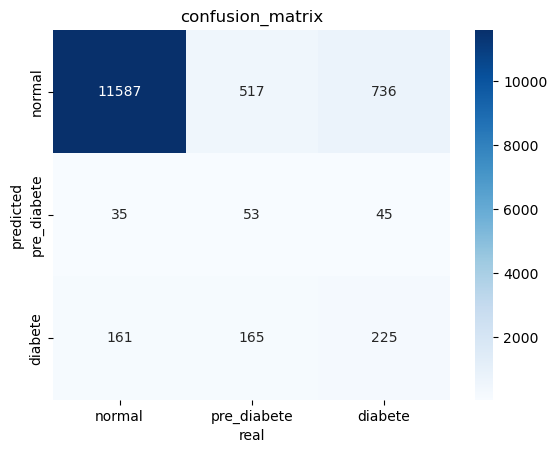

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train, sample_weight= 4)

predict_train_nb = nb_clf.predict(X_train)
predict_test_nb = nb_clf.predict(X_test)

nb_train_accuracy = accuracy_score(predict_train_nb, y_train)
nb_train_recall = recall_score(predict_train_nb, y_train, average= 'micro')
nb_train_precision = precision_score(predict_train_nb, y_train, average= 'micro')
nb_train_f1 = f1_score(predict_train_nb, y_train, average= 'micro')

nb_test_accuracy = accuracy_score(predict_test_nb, y_test)
nb_test_recall = recall_score(predict_test_nb, y_test, average= 'micro')
nb_test_precision = precision_score(predict_test_nb, y_test, average= 'micro')
nb_test_f1 = f1_score(predict_test_nb, y_test, average= 'micro')

print(f'train_accuracy_score: {nb_train_accuracy}')
print(f'train_recall_score: {nb_train_recall}')
print(f'train_precision_score: {nb_train_precision}')
print(f'train_f1_score: {nb_train_f1}')
print()
print(f'test_accuracy_score: {nb_test_accuracy}')
print(f'test_recall_score: {nb_test_recall}')
print(f'test_precision_score: {nb_test_precision}')
print(f'test_f1_score: {nb_test_f1}')

conf_matrix = confusion_matrix(y_test, predict_test_nb)

# seaborn을 사용하여 혼동 행렬을 히트맵으로 표시
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['normal', 'pre_diabete', 'diabete'],
            yticklabels=['normal', 'pre_diabete', 'diabete'])

plt.title('confusion_matrix')
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()


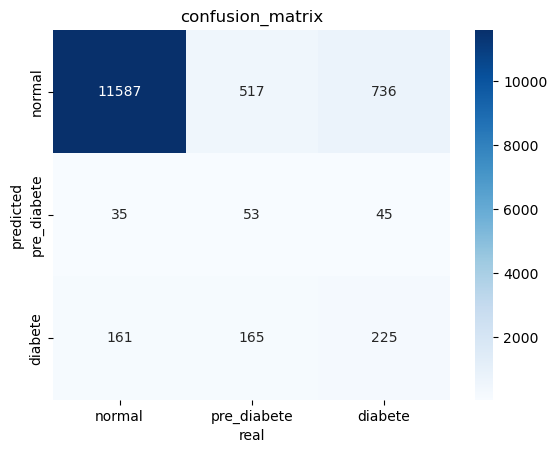

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, predict_test_nb)

# seaborn을 사용하여 혼동 행렬을 히트맵으로 표시
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['normal', 'pre_diabete', 'diabete'],
            yticklabels=['normal', 'pre_diabete', 'diabete'])

plt.title('confusion_matrix')
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()


In [4]:
bsmote = BorderlineSMOTE(random_state=42)
bsmote

BorderlineSMOTE(random_state=42)

In [5]:
sample_for_bsmote = df

X, y = bsmote.fit_resample(sample_for_bsmote.drop("diabete", axis=1), sample_for_bsmote["diabete"])
sample_for_bsmote = X
sample_for_bsmote['diabete'] = y
sample_for_bsmote

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,0.000000,2.000000,1.500000,0.900000,74.000000,200.000000,95.000000,95.000000,49.000000,14.900000,1.000000,0.500000,19.000000,13.000000,38.000000,3.000000,1.000000,20.811655,0.0
1,1.000000,0.000000,1.200000,1.200000,99.000000,192.000000,65.000000,120.000000,32.000000,15.600000,1.000000,1.100000,37.000000,35.000000,31.000000,1.000000,1.000000,26.234568,0.0
2,1.000000,2.000000,0.100000,0.300000,75.000000,157.000000,62.000000,84.000000,52.000000,15.000000,1.000000,1.000000,31.000000,57.000000,32.000000,3.000000,1.000000,23.148148,0.0
3,0.000000,3.000000,1.200000,1.500000,61.000000,145.000000,62.000000,67.000000,76.000000,12.300000,1.000000,0.500000,15.000000,11.000000,21.000000,1.000000,1.000000,20.202020,0.0
4,1.000000,3.000000,1.500000,1.500000,64.000000,207.000000,42.000000,127.000000,191.000000,16.900000,1.000000,1.100000,33.000000,59.000000,22.000000,3.000000,0.000000,26.122449,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192388,1.000000,1.704616,0.900000,0.876154,87.113847,229.658459,54.943077,135.772306,194.715383,16.487539,1.000000,0.864769,40.989233,102.704616,55.249228,1.704616,1.000000,31.311543,2.0
192389,0.071938,2.928062,0.735969,0.850356,70.431627,177.719378,66.726507,92.920933,88.359689,12.216526,1.071938,0.907194,10.791316,11.071938,54.784187,1.071938,1.000000,19.569411,2.0
192390,1.000000,3.000000,1.197635,1.197635,89.964527,189.023649,43.106419,120.881756,124.165541,16.271622,1.000000,0.898818,21.011824,26.940878,53.082770,1.023649,0.011824,31.082517,2.0
192391,0.000000,2.718566,1.274853,1.274853,75.281434,146.820237,34.065816,42.317290,349.592829,10.740128,1.000000,0.771857,10.532908,7.814342,22.940079,1.000000,0.281434,27.655634,2.0


In [8]:
sample_for_bsmote.to_csv("sample_for_enn_bsmote.csv", index = False)

In [6]:
sample_for_bsmote['diabete'].value_counts()

0.0    64131
1.0    64131
2.0    64131
Name: diabete, dtype: int64

In [27]:
from pycaret.classification import *
exp_name = setup(data =  sample_for_bsmote.sample(n=50000),  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

,Description,Value
0,Session id,3612
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(50000, 19)"
4,Transformed data shape,"(50000, 19)"
5,Transformed train set shape,"(35000, 19)"
6,Transformed test set shape,"(15000, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9423,0.9837,0.9423,0.9445,0.9417,0.9134,0.9150,6.4660
nb,Naive Bayes,0.6595,0.8381,0.6595,0.6679,0.6433,0.4894,0.5046,7.3610
svm,SVM - Linear Kernel,0.5978,0.0000,0.5978,0.6468,0.5491,0.3967,0.4450,6.3820


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9414,0.9829,0.9414,0.9442,0.9409,0.9121,0.9139
1,0.9429,0.9856,0.9429,0.9457,0.9422,0.9143,0.9162
2,0.9409,0.9839,0.9409,0.9422,0.9403,0.9113,0.9124
3,0.9474,0.9855,0.9474,0.9488,0.9470,0.9211,0.9222
4,0.9351,0.9796,0.9351,0.9378,0.9345,0.9027,0.9045
5,0.9406,0.9834,0.9406,0.9432,0.9398,0.9108,0.9128
6,0.9469,0.9851,0.9469,0.9487,0.9463,0.9203,0.9216
7,0.9397,0.9825,0.9397,0.9424,0.9390,0.9096,0.9114
8,0.9417,0.9839,0.9417,0.9437,0.9411,0.9126,0.9140


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

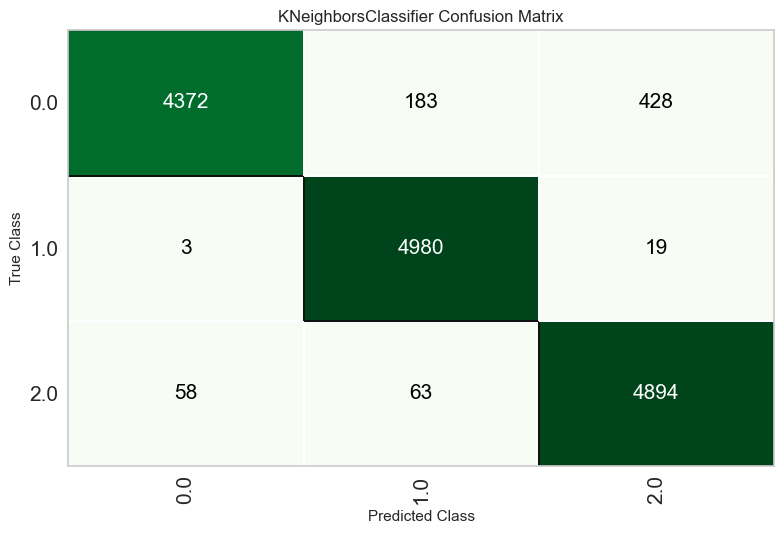

In [28]:
knn = create_model('knn')
plot_model(knn, plot = 'confusion_matrix')

In [30]:
plot_model(knn, plot = 'feature_importances')

ValueError: Plot Not Available. Please see docstring for list of available Plots.